In [84]:
import pandas as pd
import seaborn as sns

In [85]:
df = pd.read_csv("BlackFriday.csv")

In [86]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [88]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [89]:
# Deleting rows which have null values
del df['Product_Category_2']
del df['Product_Category_3']

In [90]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

In [91]:
print("There are",df['User_ID'].nunique(),"unique users")  # To know how many unique users are there
print("There are",df['Product_ID'].nunique(),"unique products")
print("There are",df['Product_Category_1'].nunique(),"unique product caegories")

There are 5891 unique users
There are 3623 unique products
There are 18 unique product caegories


In [92]:
print("The unique genders are                                 :",df['Gender'].unique())
print("The unique age groups are                              :",df['Age'].unique())
print("The unique occupaions are                              :",df['Occupation'].unique())
print("The unique cities are                                  :",df["City_Category"].unique())
print("The number of years the users might have in cities are :",df['Stay_In_Current_City_Years'].unique())
print("The marital status of users are                        :",df['Marital_Status'].unique())
print("The diiferent product categories we are having ar      :",df['Product_Category_1'].unique()) 

The unique genders are                                 : ['F' 'M']
The unique age groups are                              : ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
The unique occupaions are                              : [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
The unique cities are                                  : ['A' 'C' 'B']
The number of years the users might have in cities are : ['2' '4+' '3' '1' '0']
The marital status of users are                        : [0 1]
The diiferent product categories we are having ar      : [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]


In [93]:
df['Purchase'].sum()  # Amount of sales done on Black Friday

5017668378

In [94]:
df[df['Gender'] == 'M']  # To determine the male buyers

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


In [95]:
len(df[df['Gender'] == 'F'])  # To know the numbers of female buyers

132197

In [96]:
data = pd.DataFrame({'Ratio' : [len(df[df['Gender'] == 'M']), len(df[df['Gender'] == 'F'])]}, index = ['Male', 'Female'])

In [97]:
data

,Ratio
Male,405380
Female,132197


<Axes: ylabel='Ratio'>

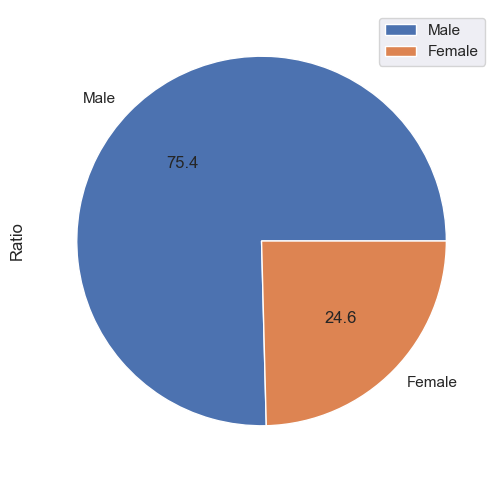

In [98]:
data.plot.pie(y = 'Ratio', figsize = (6,6), autopct = "%.1f")

C:\Users\scs\AppData\Local\Temp\ipykernel_8856\738548447.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Gender').mean()['Purchase'].plot(kind = 'pie', autopct = '%0.1f')


<Axes: ylabel='Purchase'>

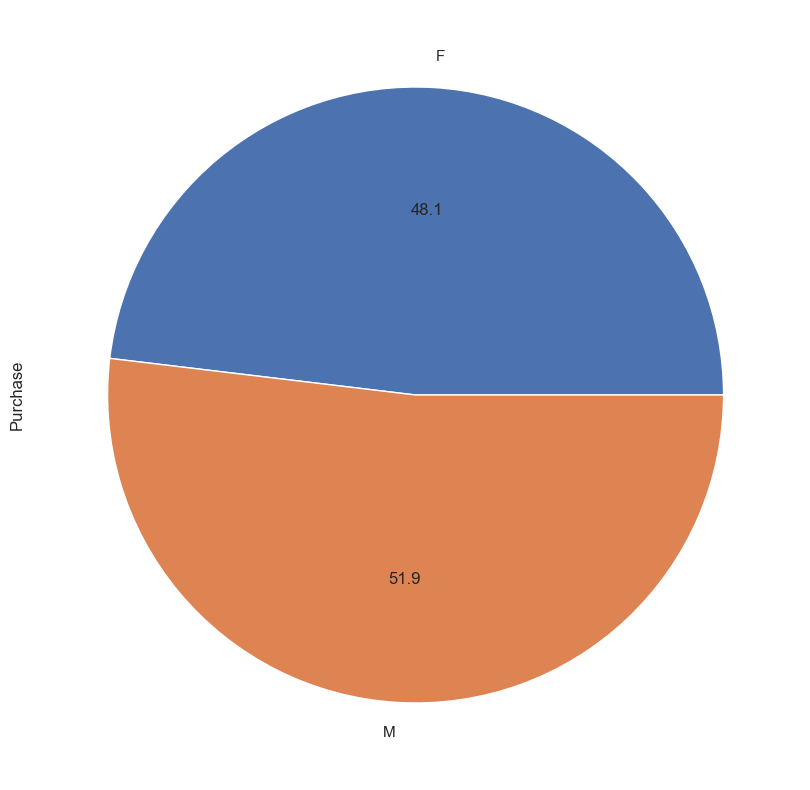

In [99]:
df.groupby('Gender').mean()['Purchase'].plot(kind = 'pie', autopct = '%0.1f')

#### Purchases made by different age groups

<Axes: title={'center': 'Purchase distributuin based on age'}, xlabel='Age'>

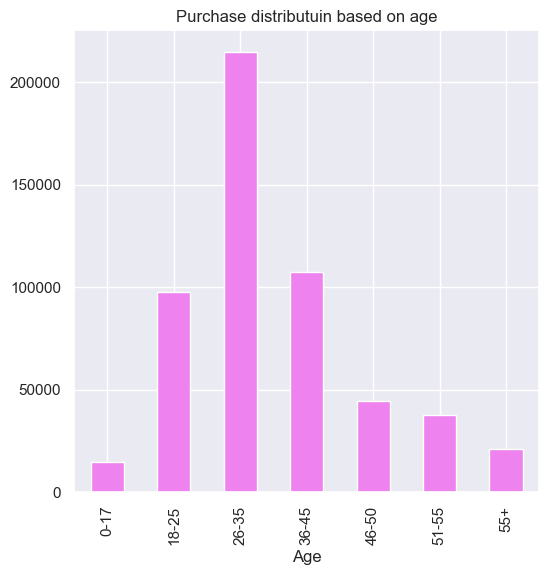

In [135]:
df.groupby('Age').size().plot(kind = 'bar', color = 'violet', figsize = (6, 6), title = 'Purchase distributuin based on age')

C:\Users\scs\AppData\Local\Temp\ipykernel_8856\806542314.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Age').mean()['Purchase'].plot(kind = 'pie', autopct = '%0.1f')


<Axes: ylabel='Purchase'>

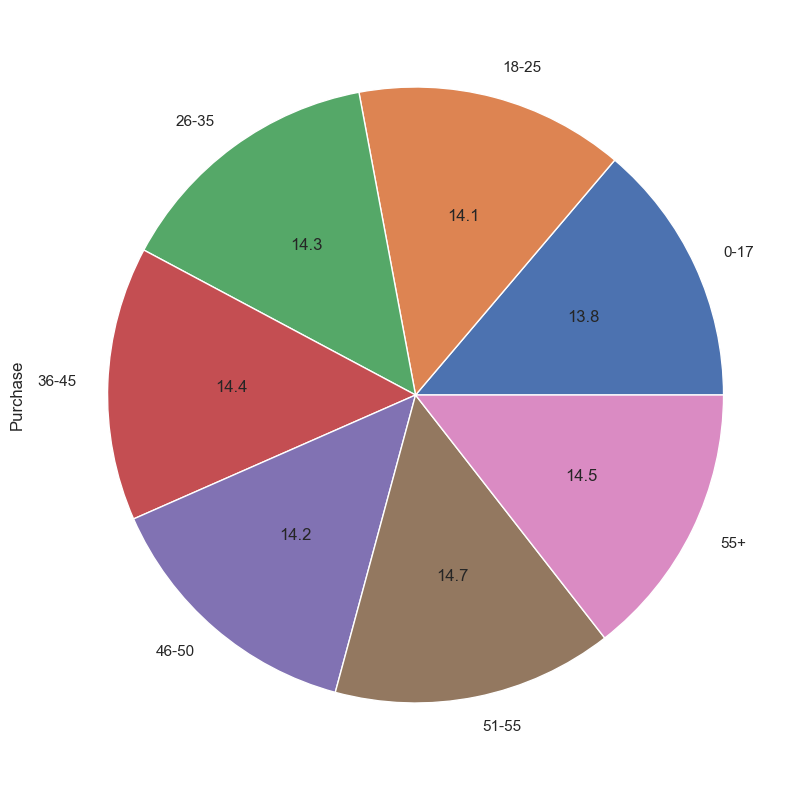

In [101]:
df.groupby('Age').mean()['Purchase'].plot(kind = 'pie', autopct = '%0.1f')

<Axes: xlabel='Marital_Status'>

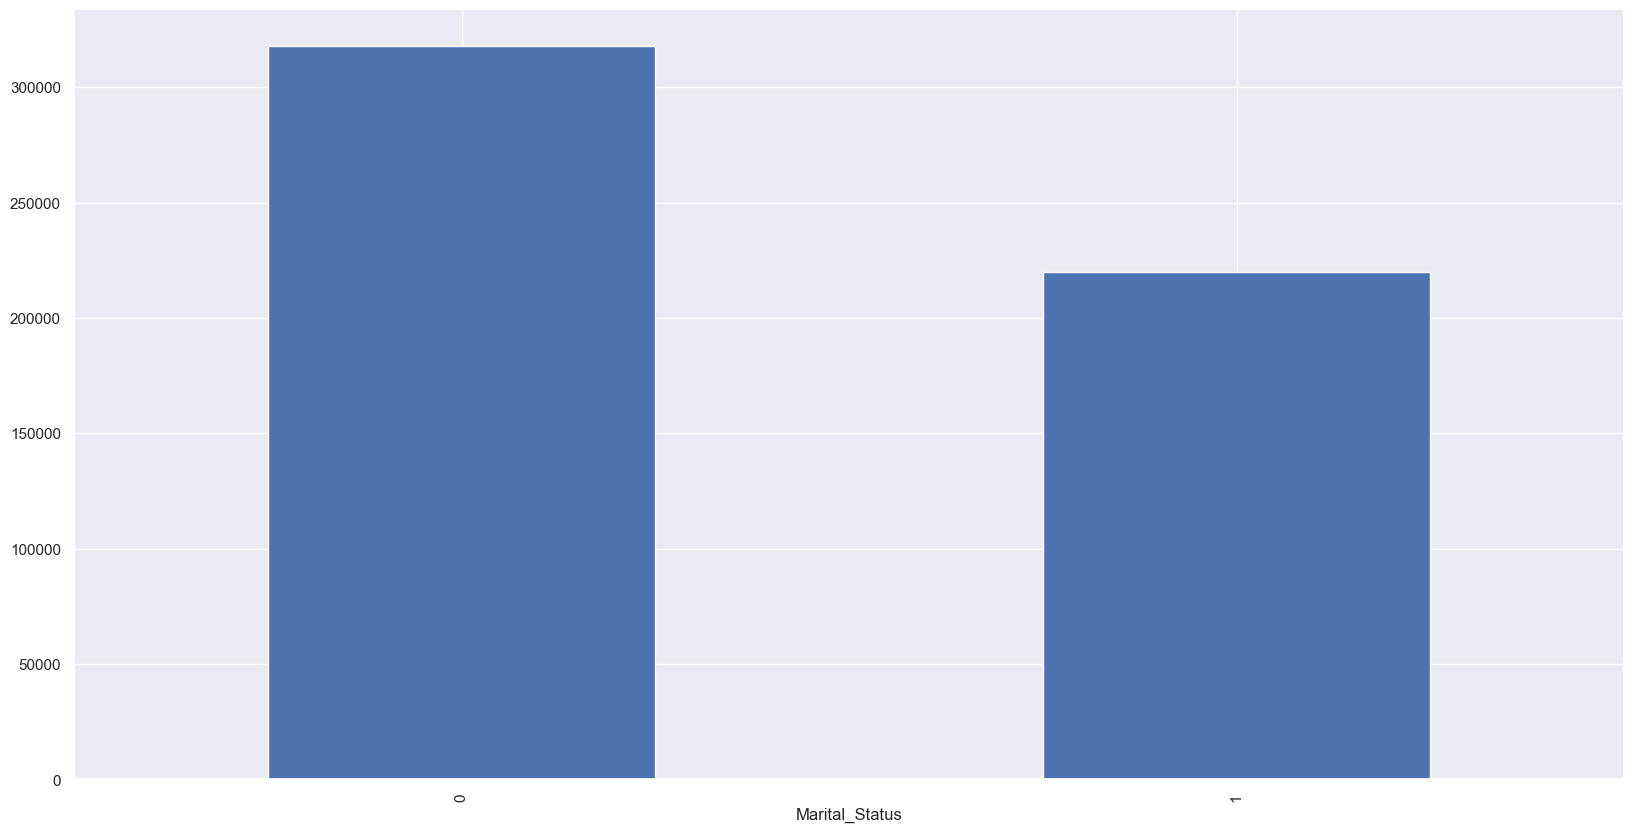

In [102]:
df.groupby('Marital_Status').size().plot(kind = 'bar')  # To know how many buyers are married and how many are no married

<Axes: >

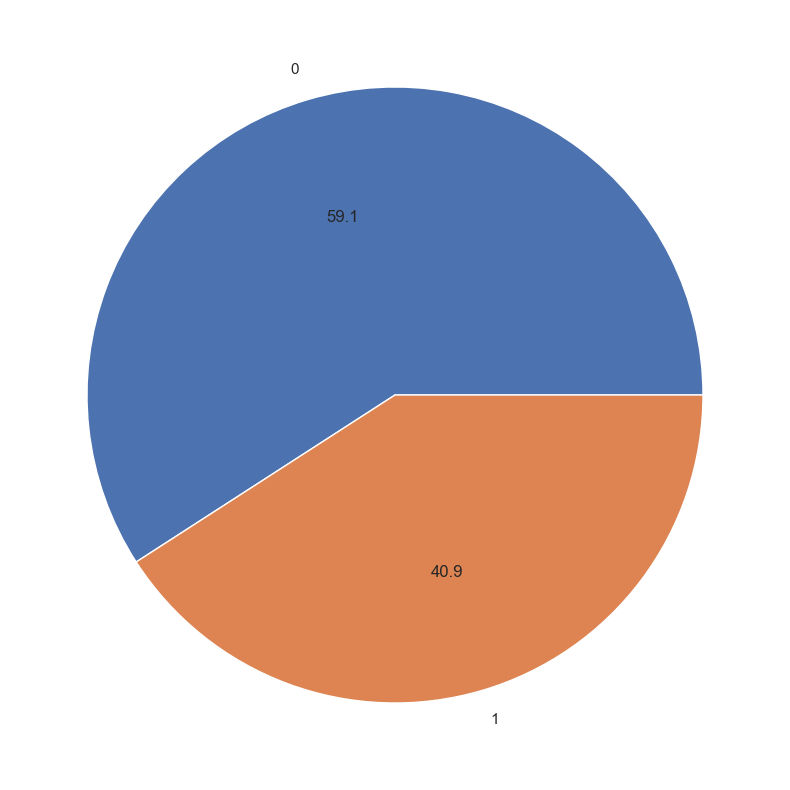

In [103]:
df.groupby('Marital_Status').size().plot(kind = 'pie', autopct = '%0.1f')

<Axes: xlabel='Age', ylabel='count'>

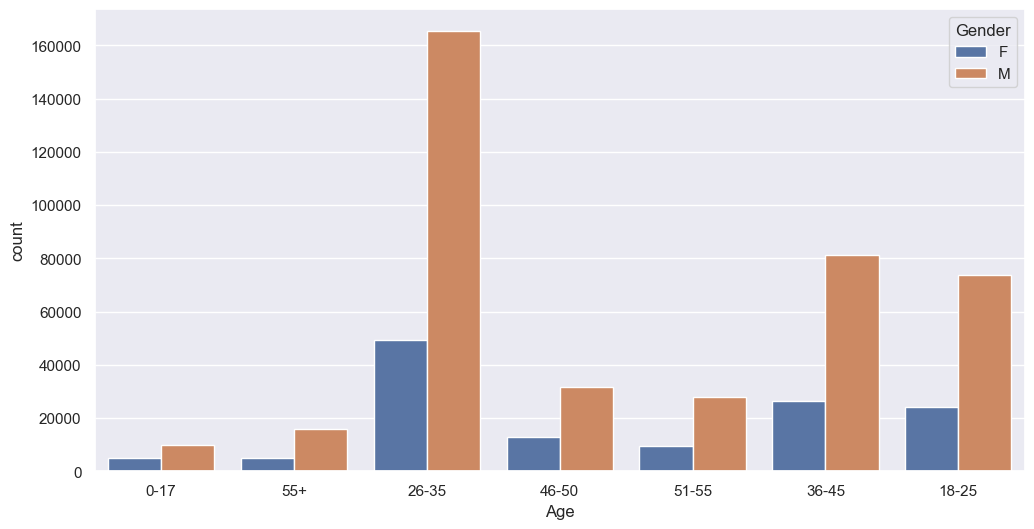

In [104]:
sns.set(rc = {"figure.figsize" : (12,6)})
sns.countplot(x = 'Age', hue = 'Gender', data = df)

<Axes: xlabel='Gender', ylabel='count'>

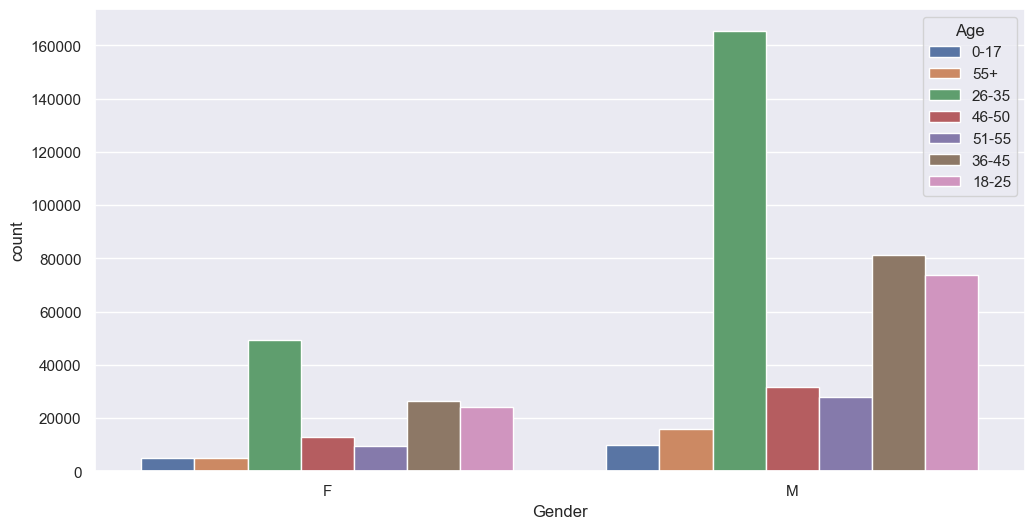

In [105]:
sns.set(rc = {"figure.figsize" : (12,6)})
sns.countplot(x = 'Gender', hue = 'Age', data = df)

<Axes: xlabel='City_Category', ylabel='count'>

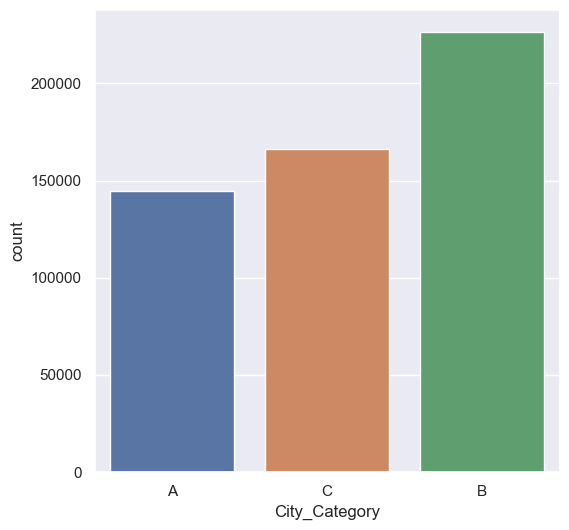

In [106]:
sns.set(rc = {'figure.figsize' : (6,6)})
sns.countplot(x = 'City_Category', data = df)

<Axes: xlabel='Marital_Status', ylabel='count'>

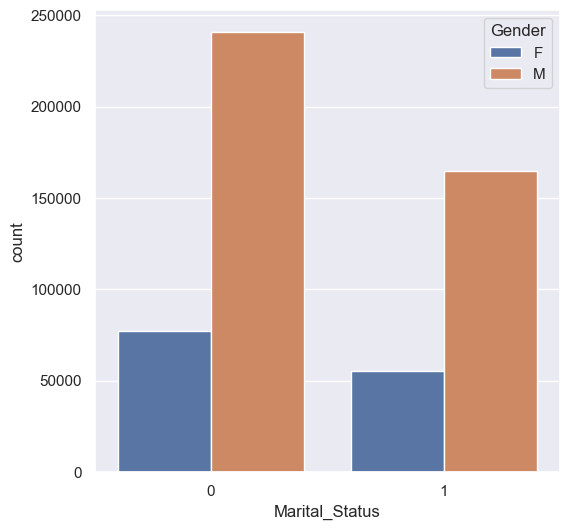

In [107]:
sns.countplot(x = 'Marital_Status', hue = 'Gender', data = df)

<Axes: xlabel='City_Category', ylabel='count'>

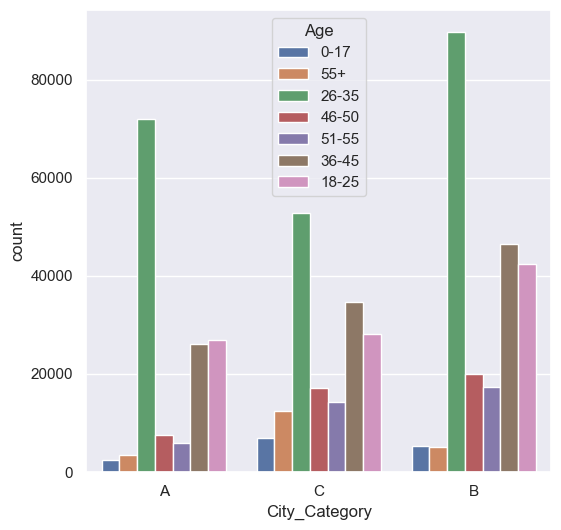

In [108]:
sns.countplot(x = 'City_Category', hue = 'Age', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

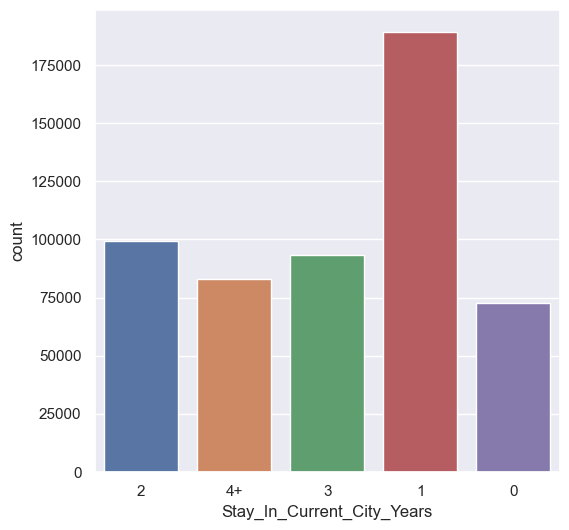

In [109]:
sns.countplot(x = 'Stay_In_Current_City_Years', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

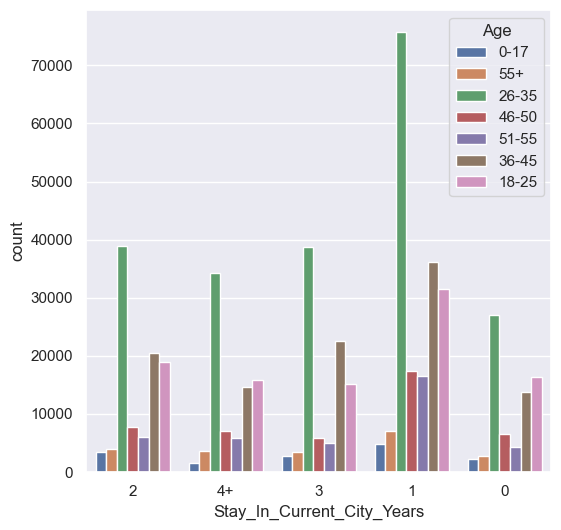

In [110]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Age', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

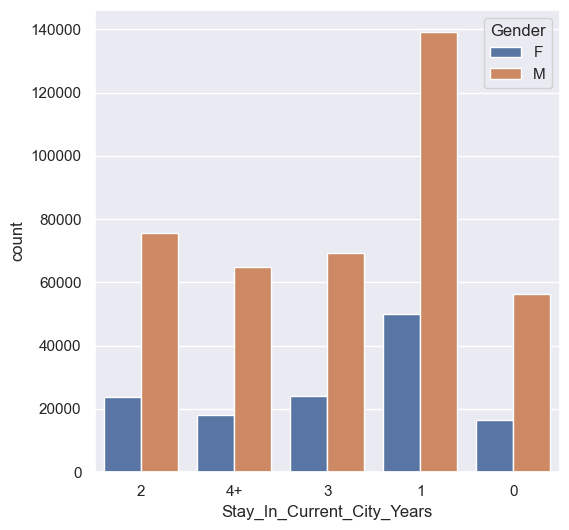

In [111]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Gender', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

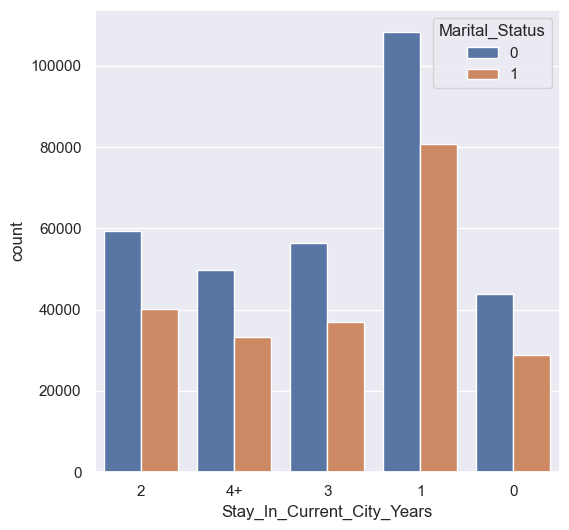

In [112]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Marital_Status', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

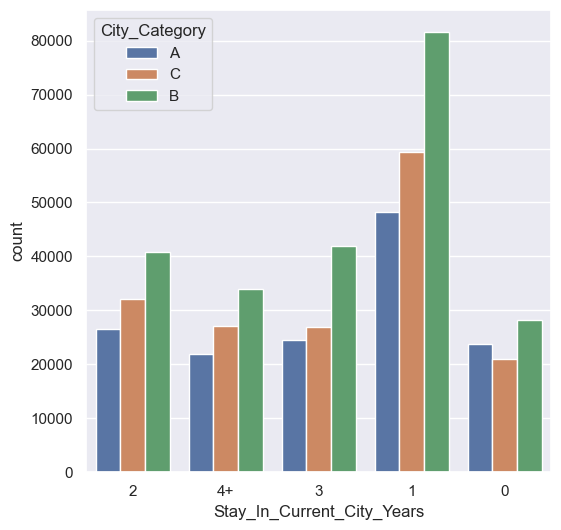

In [113]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'City_Category', data = df)

<Axes: xlabel='Occupation'>

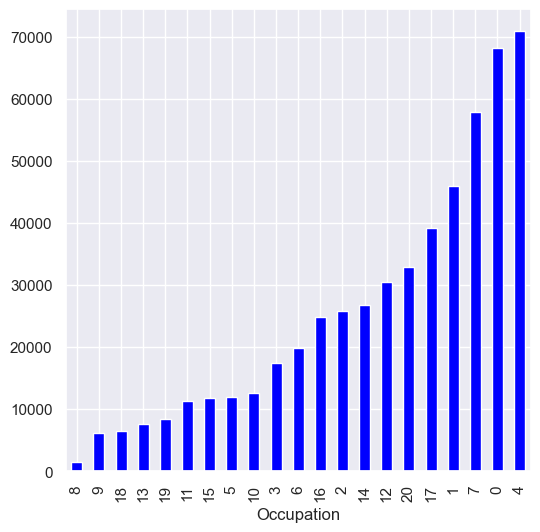

In [114]:
df.groupby('Occupation').size().sort_values().plot(kind = 'bar', color = 'blue')

C:\Users\scs\AppData\Local\Temp\ipykernel_8856\2195280667.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind = 'bar')


<Axes: xlabel='Occupation'>

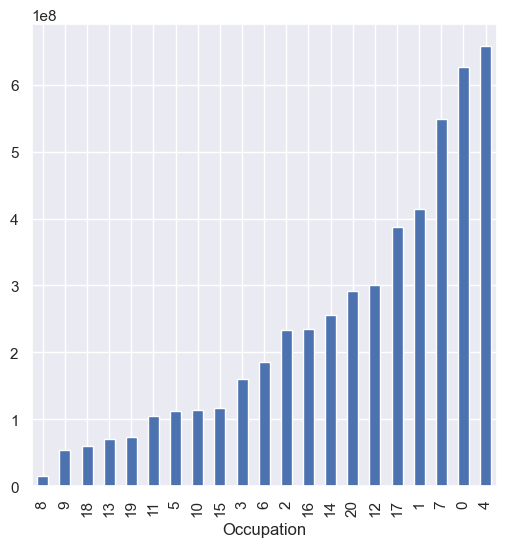

In [115]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind = 'bar')

C:\Users\scs\AppData\Local\Temp\ipykernel_8856\836120488.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Occupation').mean()['Purchase'].sort_values().plot(kind = 'bar')


<Axes: xlabel='Occupation'>

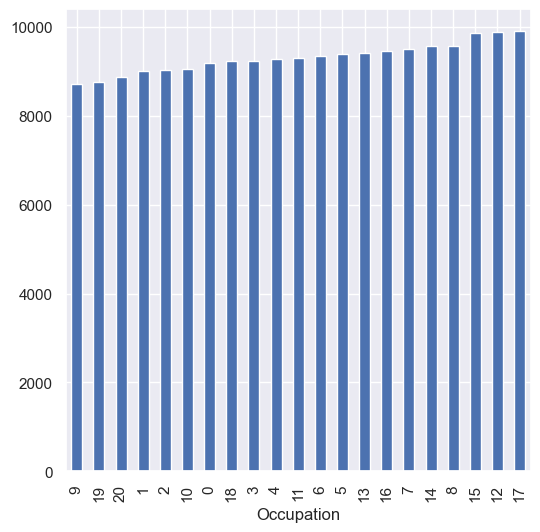

In [116]:
df.groupby('Occupation').mean()['Purchase'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

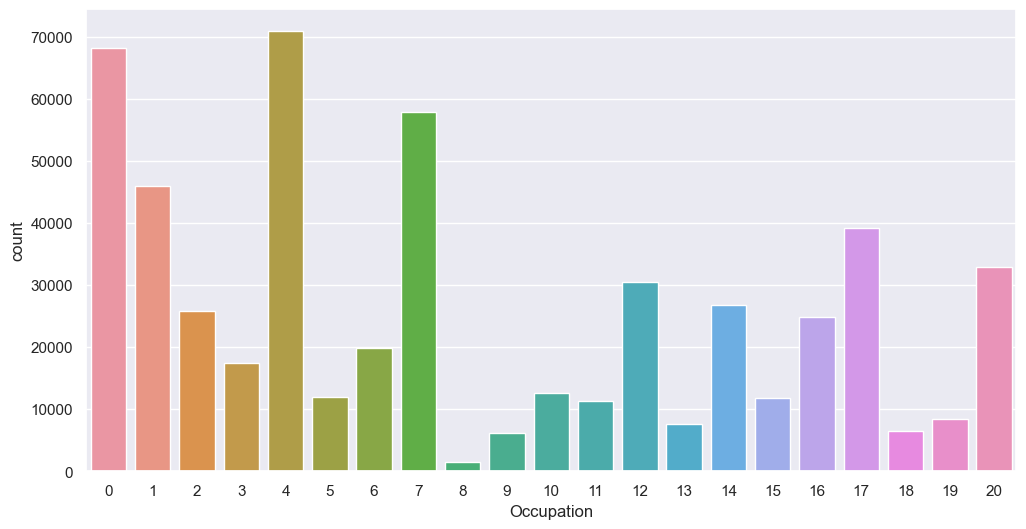

In [117]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = 'Occupation', data = df)

<Axes: xlabel='Occupation', ylabel='count'>

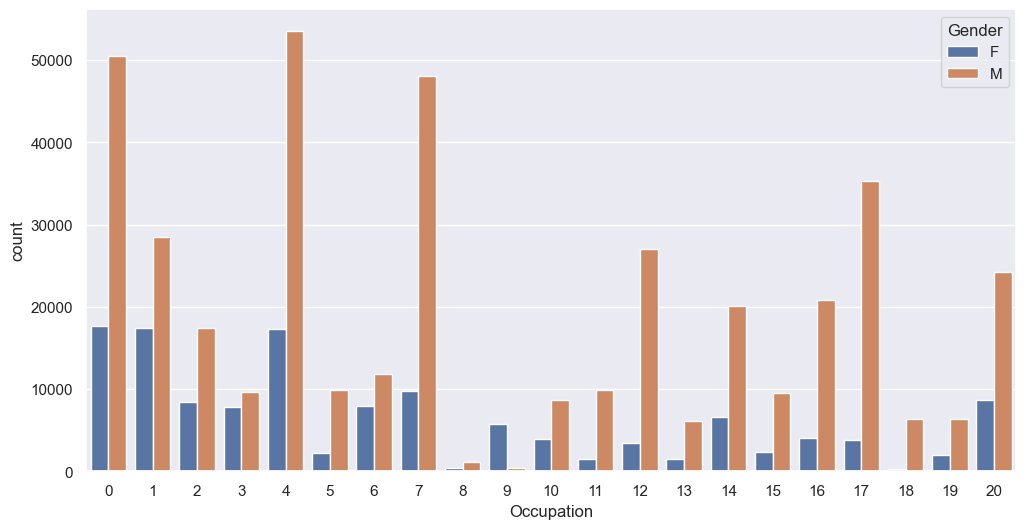

In [118]:
sns.countplot(x = 'Occupation', hue = 'Gender', data = df)

<Axes: xlabel='Occupation', ylabel='count'>

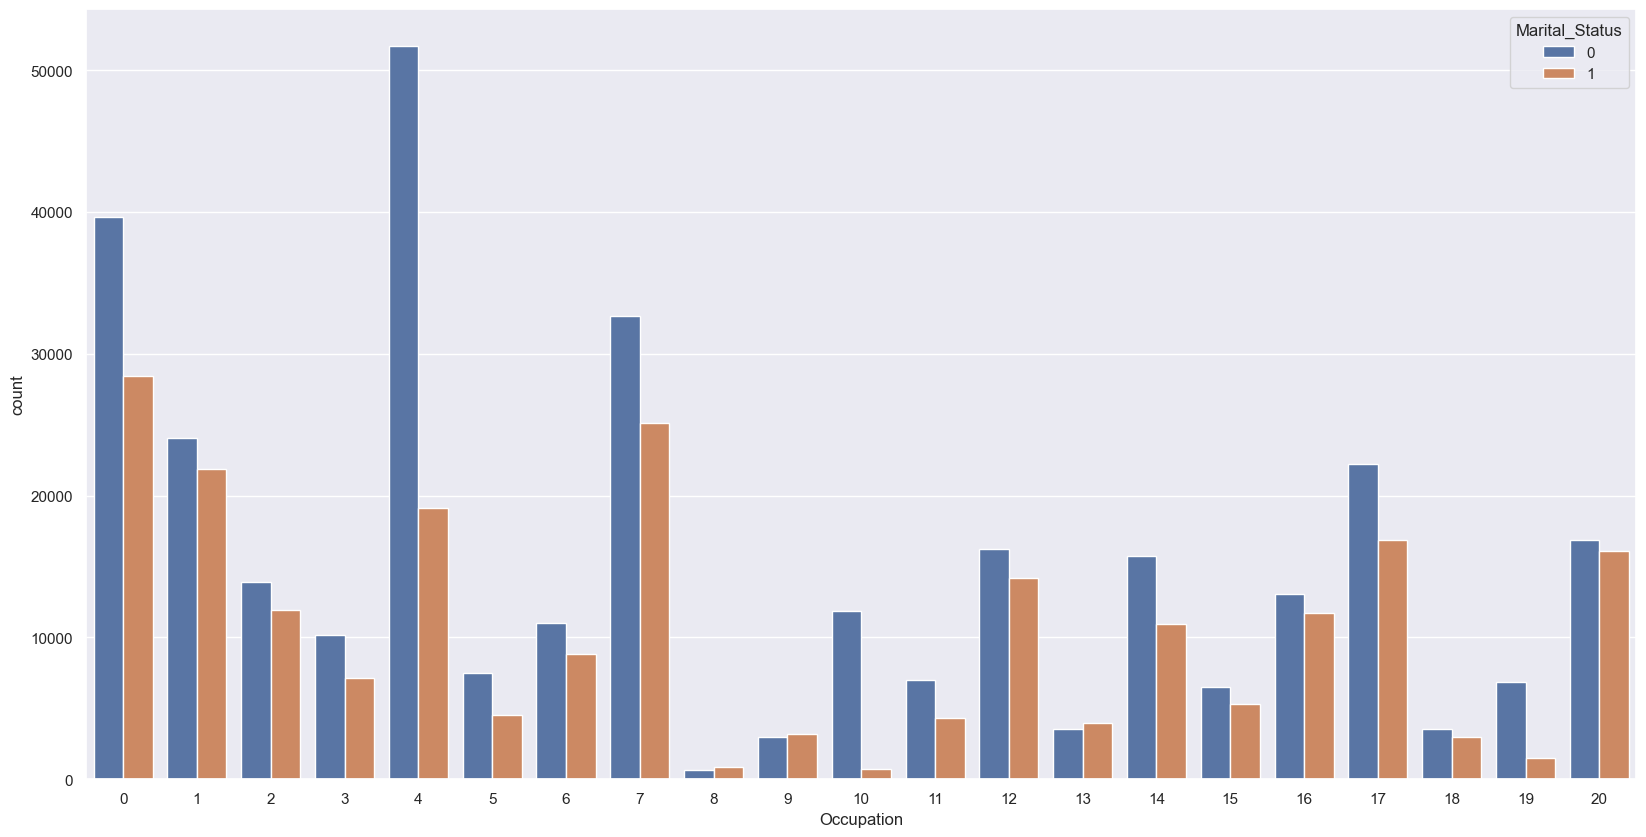

In [119]:
sns.set(rc = {"figure.figsize" : (20,10)})
sns.countplot(x = 'Occupation', hue = 'Marital_Status', data = df)

<Axes: xlabel='Occupation'>

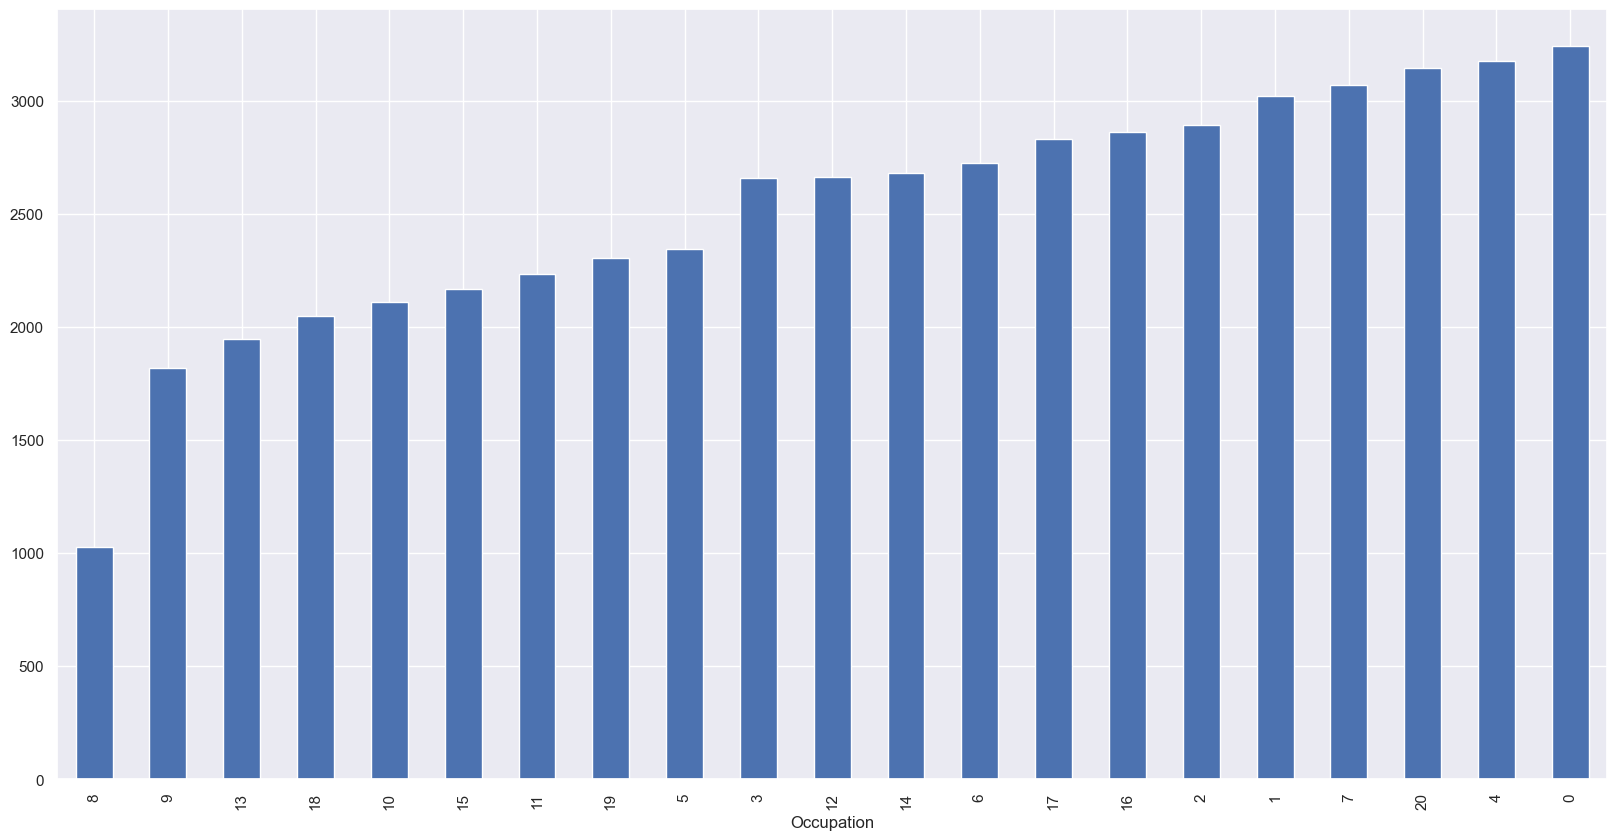

In [120]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

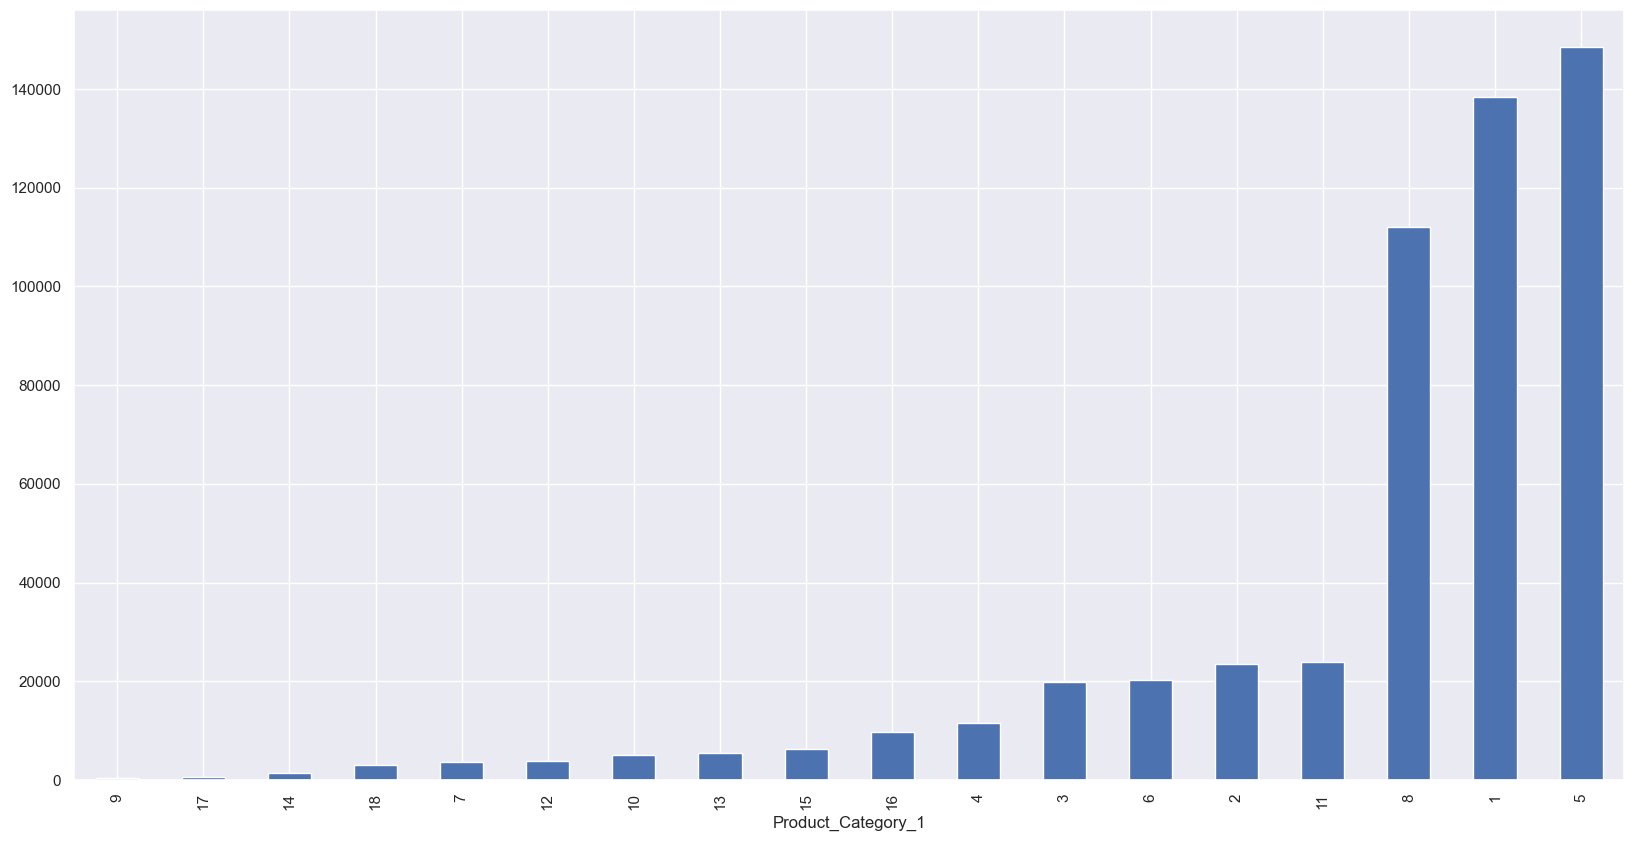

In [121]:
df.groupby('Product_Category_1').size().sort_values().plot(kind = 'bar')

C:\Users\scs\AppData\Local\Temp\ipykernel_8856\2703638129.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind = 'bar')


<Axes: xlabel='Product_Category_1'>

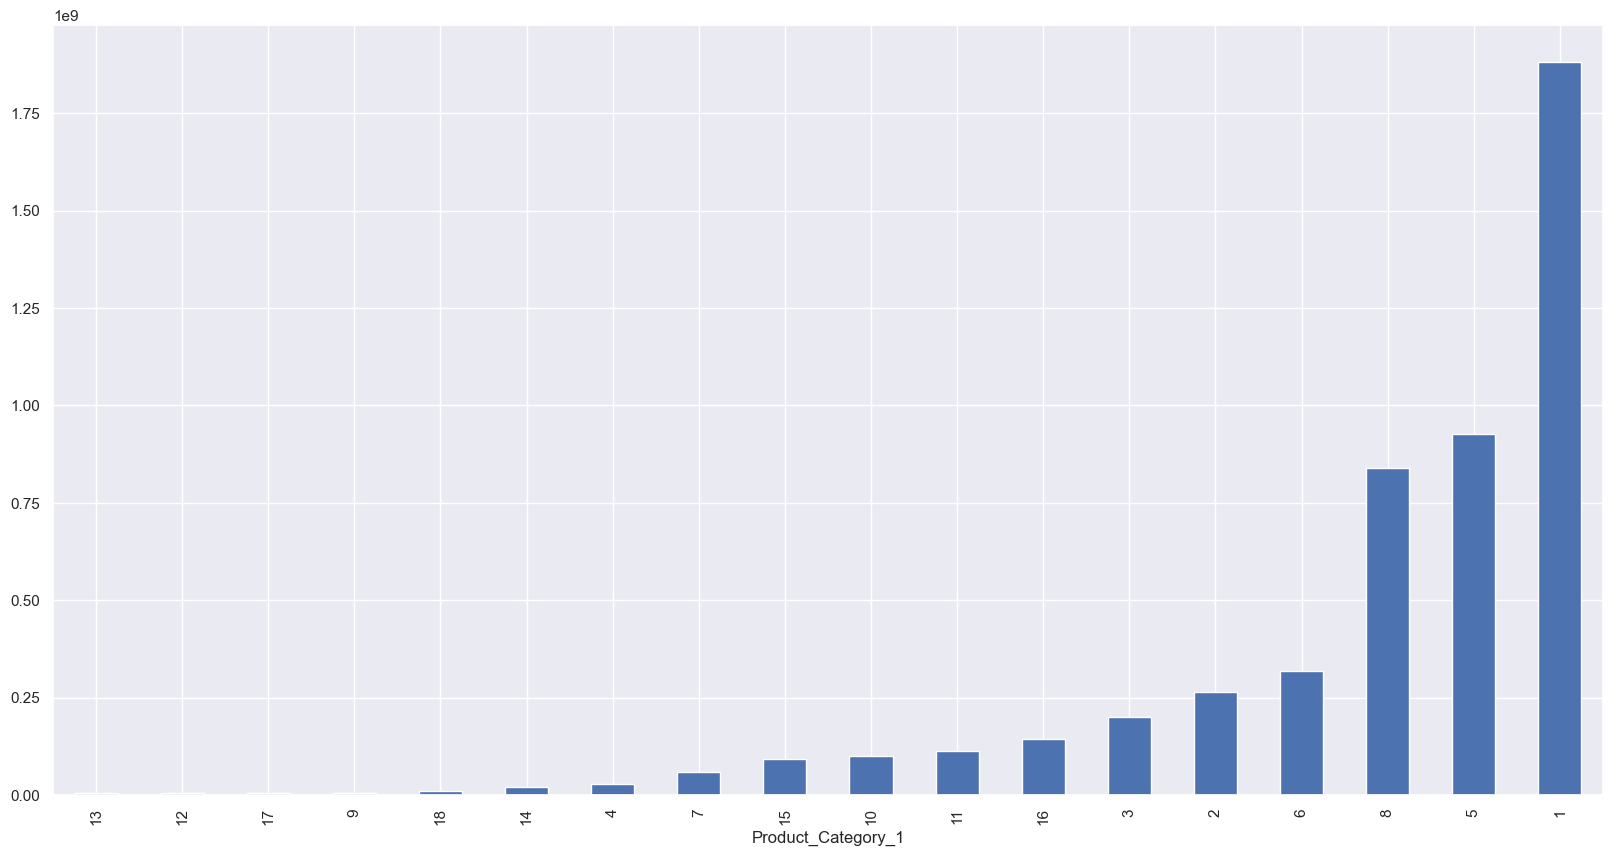

In [122]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind = 'bar')

C:\Users\scs\AppData\Local\Temp\ipykernel_8856\3011761601.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot(kind = 'bar')


<Axes: xlabel='Product_Category_1'>

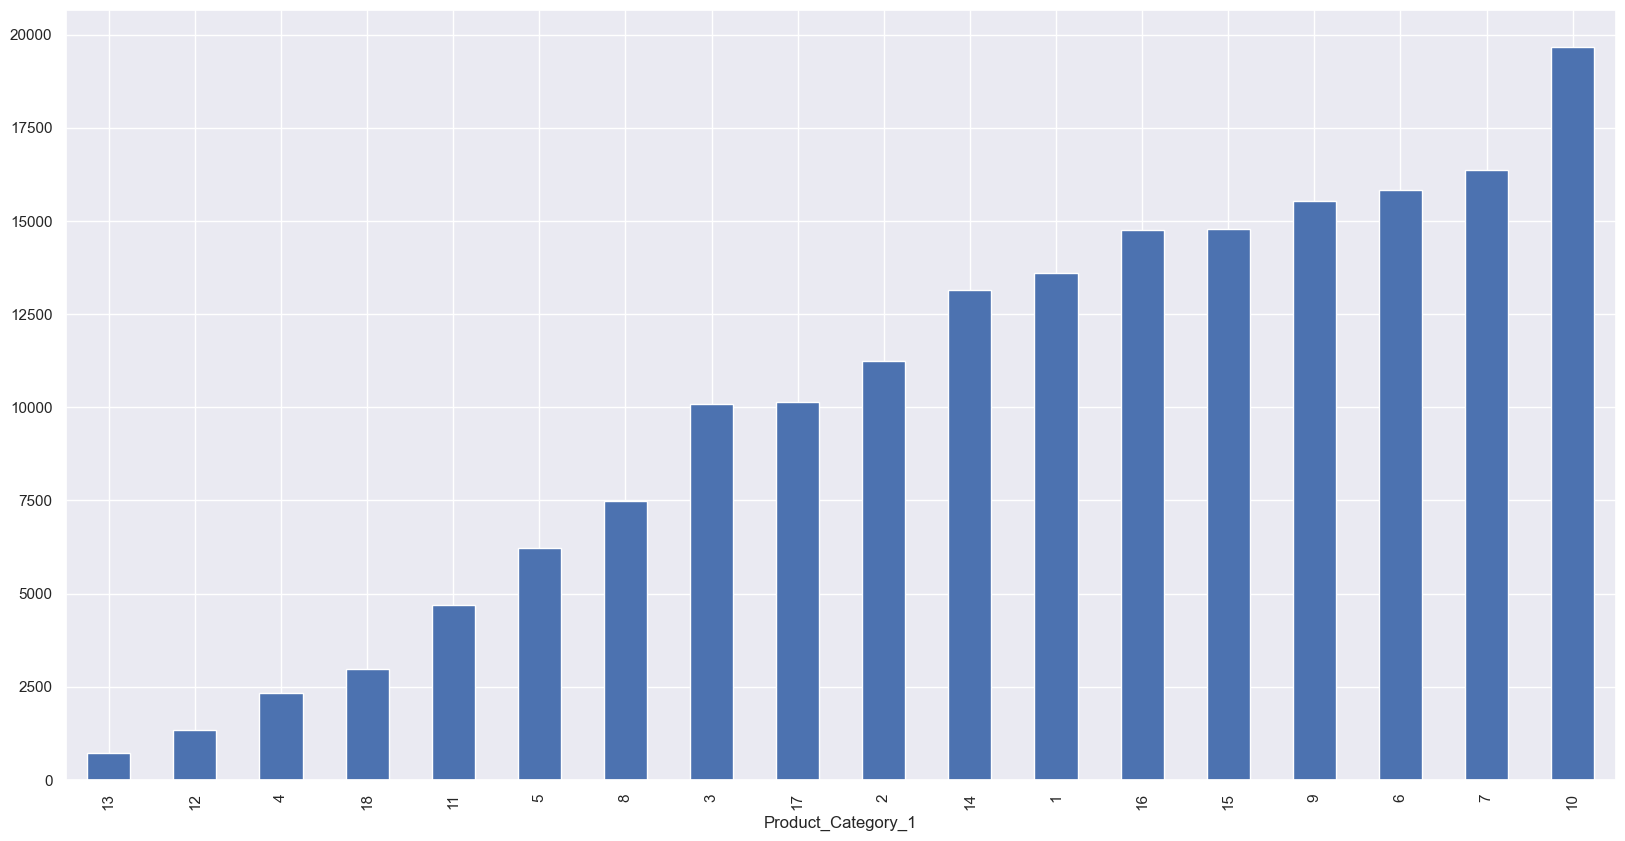

In [123]:
df.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot(kind = 'bar')

C:\Users\scs\AppData\Local\Temp\ipykernel_8856\1632911214.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')


<Axes: xlabel='Product_ID'>

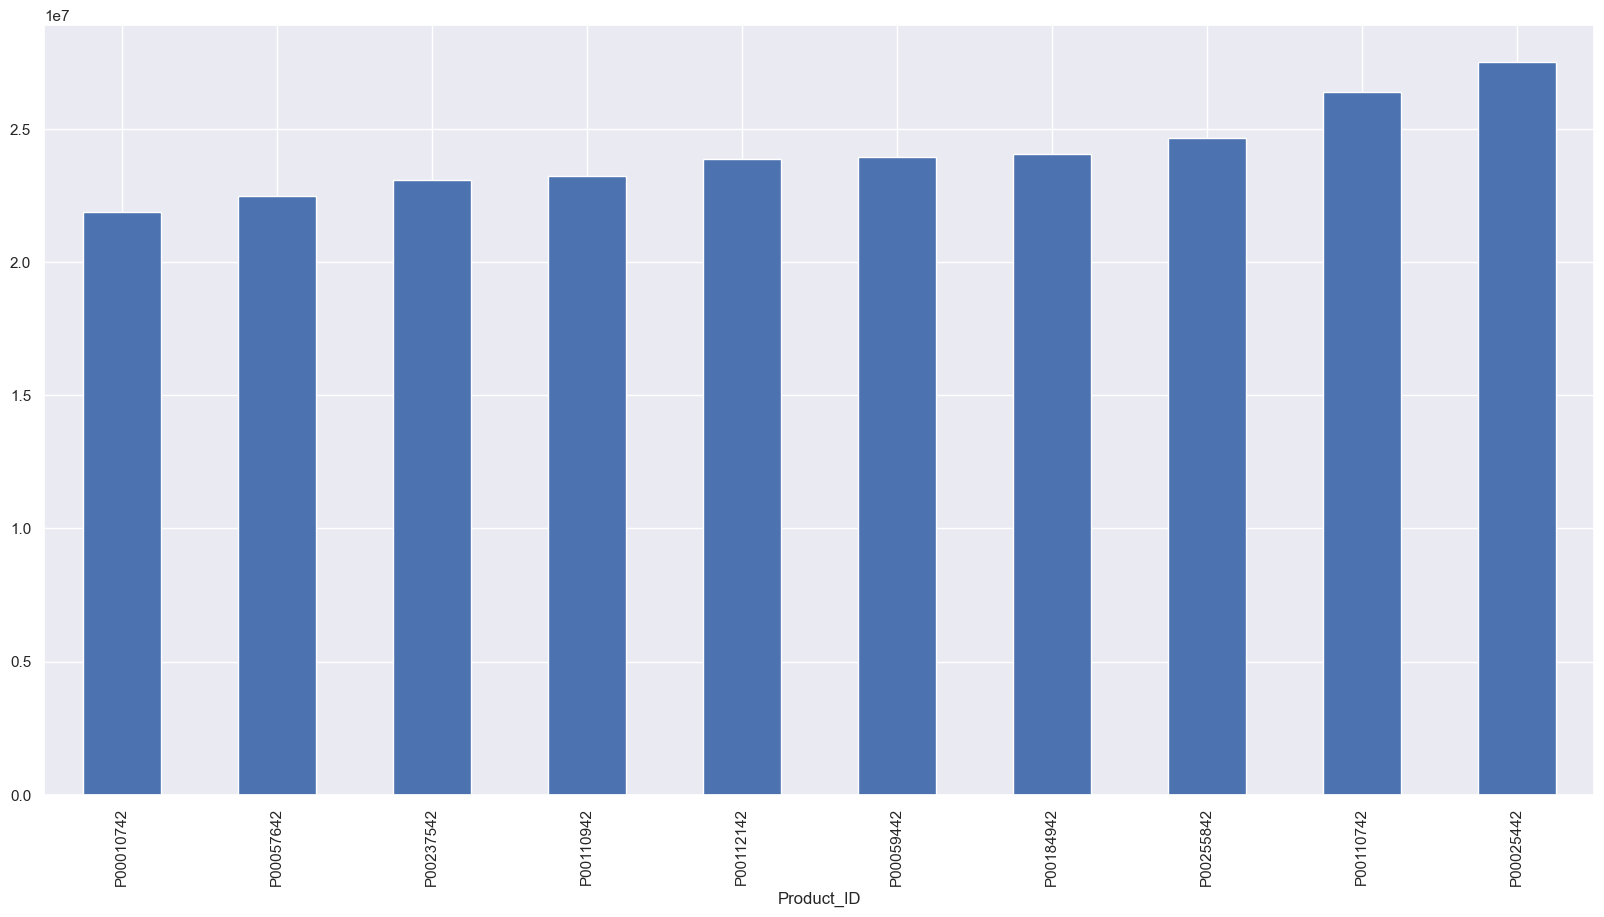

In [124]:
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')

In [125]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [126]:
l = []

for i in range (len(df)):
    l.append(df['Gender'][i] + '_' + str(df['Marital_Status'][i]))
    
df['Marital_Gender'] = l

In [127]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Marital_Gender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


In [128]:
df['Marital_Gender']

0         F_0
1         F_0
2         F_0
3         F_0
4         M_0
         ... 
537572    M_0
537573    M_0
537574    M_0
537575    M_0
537576    M_0
Name: Marital_Gender, Length: 537577, dtype: object

<Axes: xlabel='Marital_Gender', ylabel='count'>

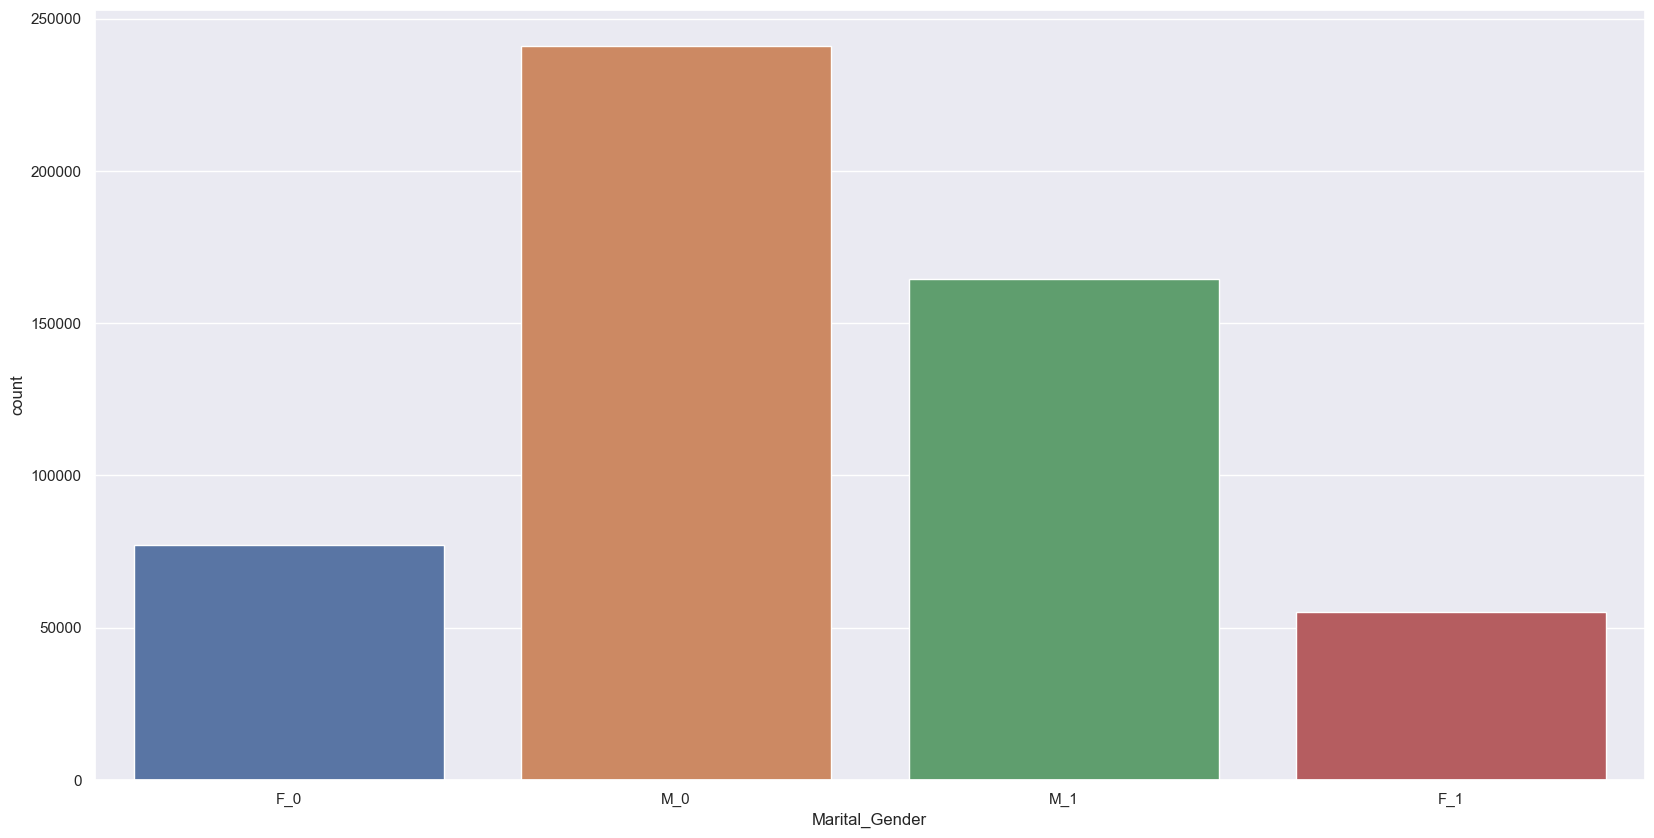

In [129]:
sns.countplot(x = 'Marital_Gender', data = df)

<Axes: xlabel='Age', ylabel='count'>

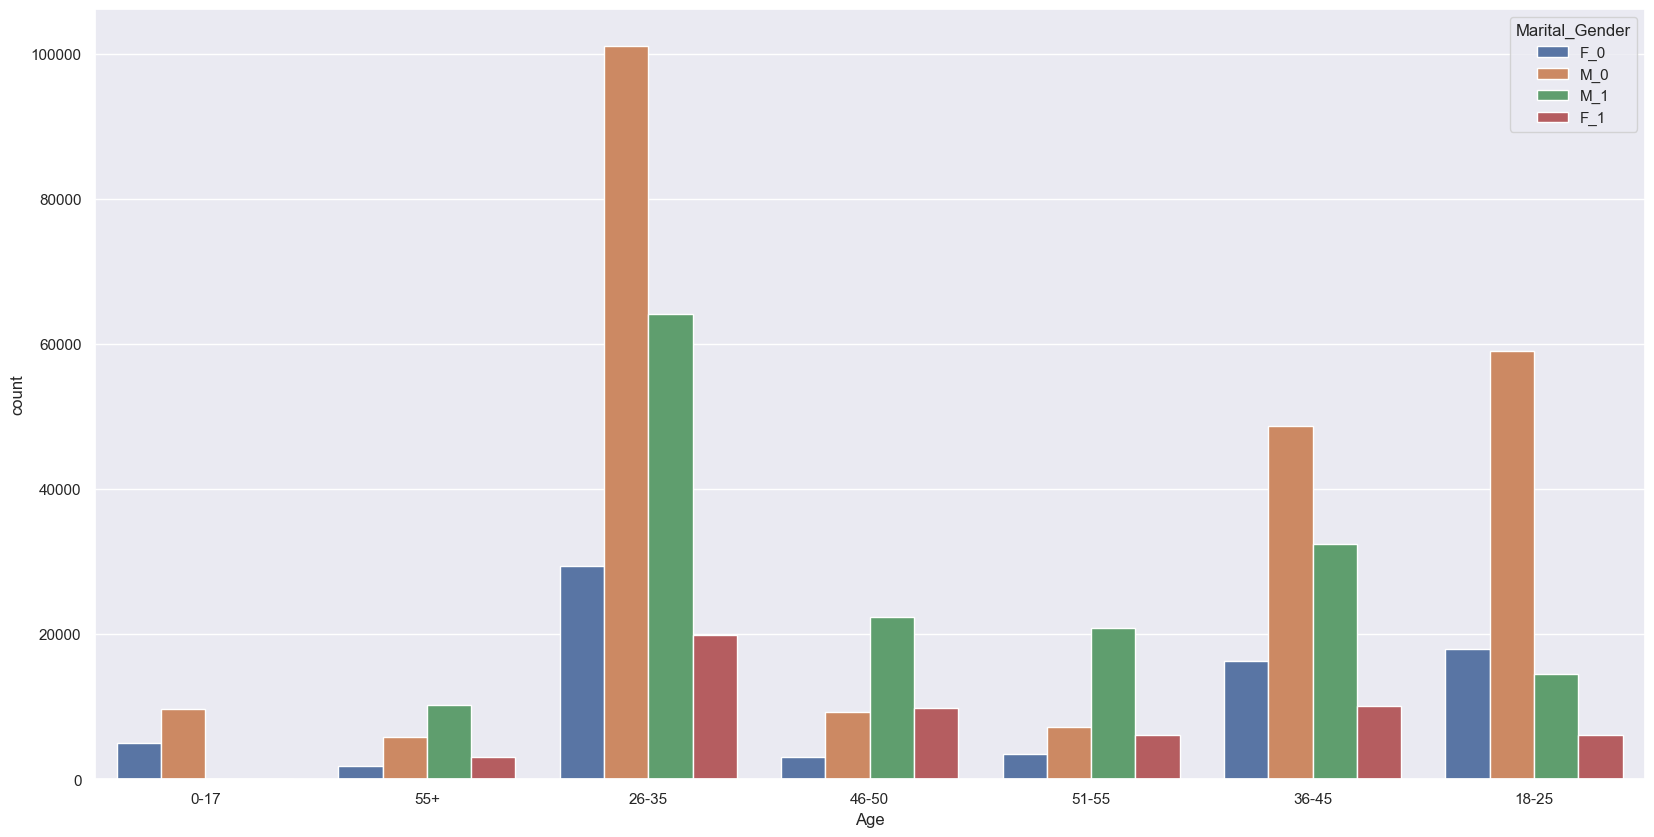

In [130]:
sns.countplot(x = 'Age', hue = 'Marital_Gender', data = df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

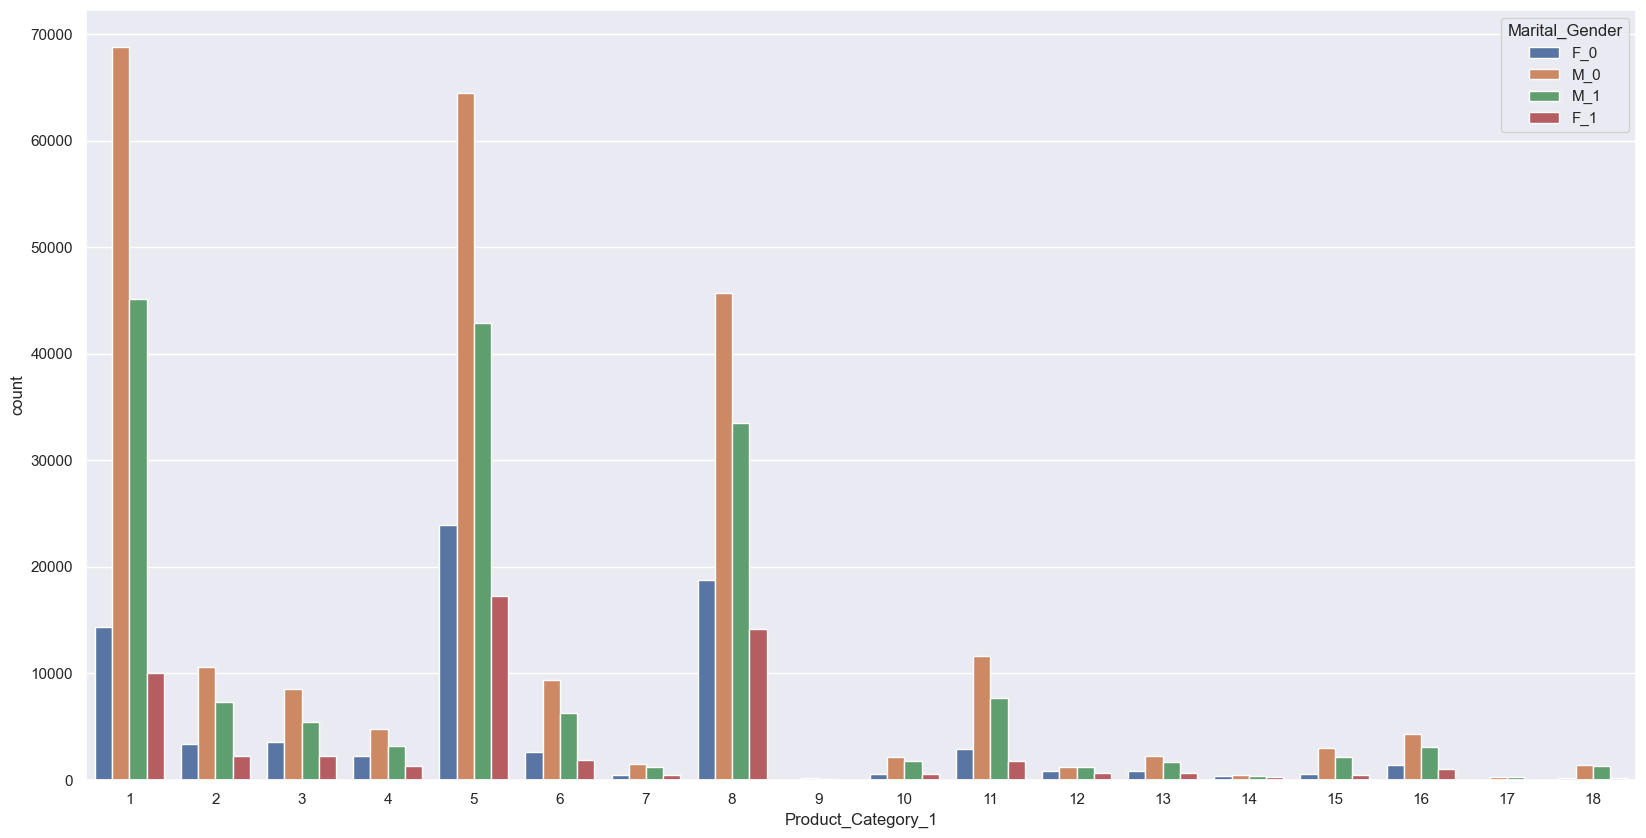

In [131]:
sns.countplot(x = 'Product_Category_1', hue = 'Marital_Gender', data = df)

In [132]:
df['Product_Category_1'].nunique()

18

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

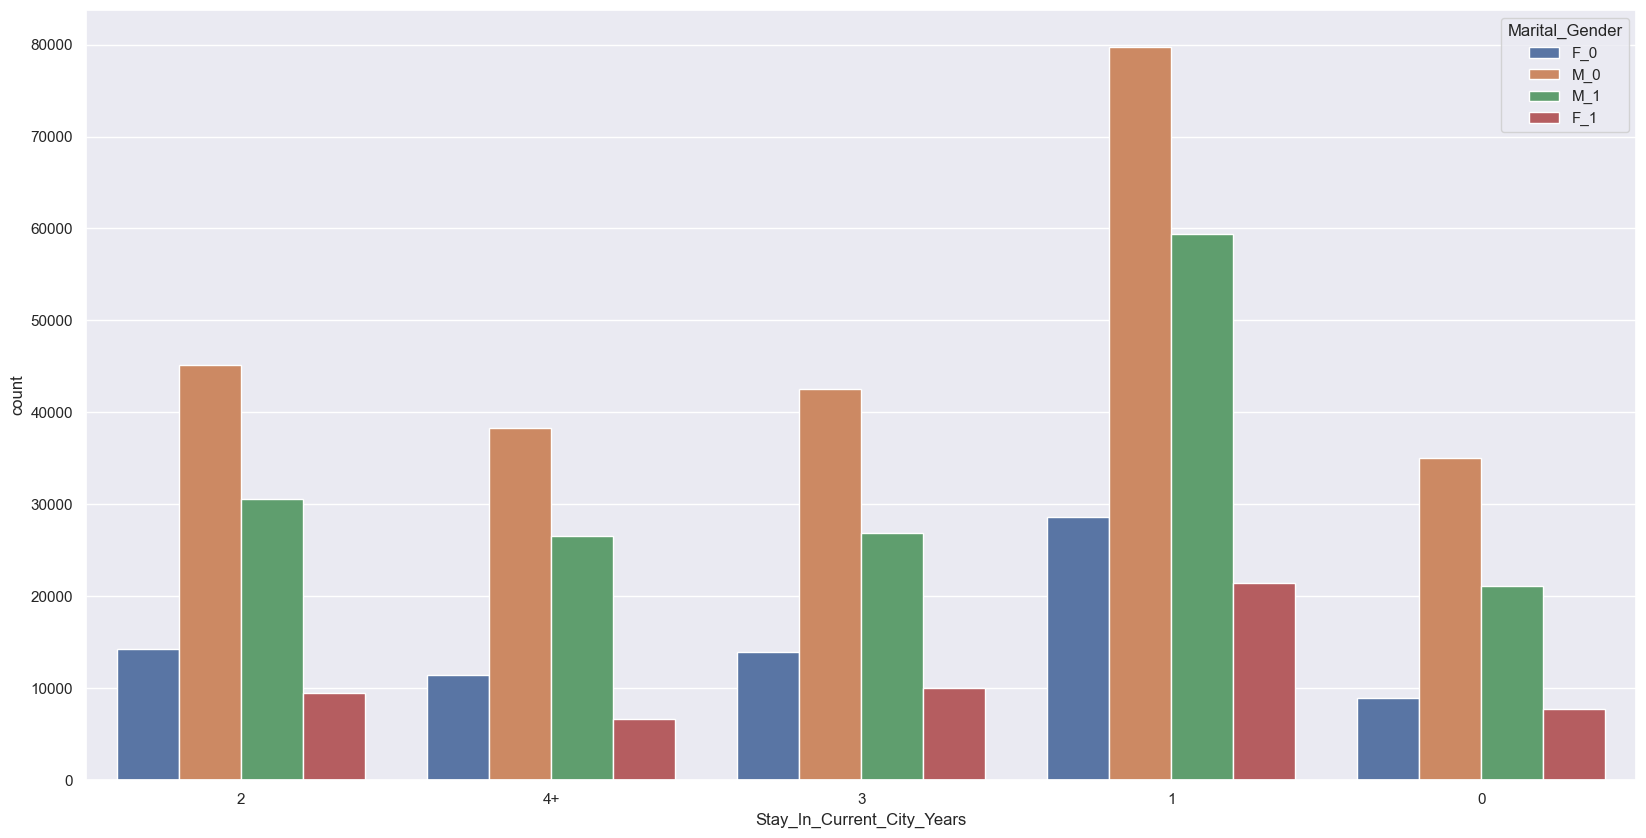

In [133]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Marital_Gender', data = df)